In [4]:
from __future__ import division
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# Functions to Optimize

## Sphere 

In [15]:
def sphere(x):
    x = np.array(x)
    return np.sum(x**2)

In [16]:
sphere([1,2,3])

14

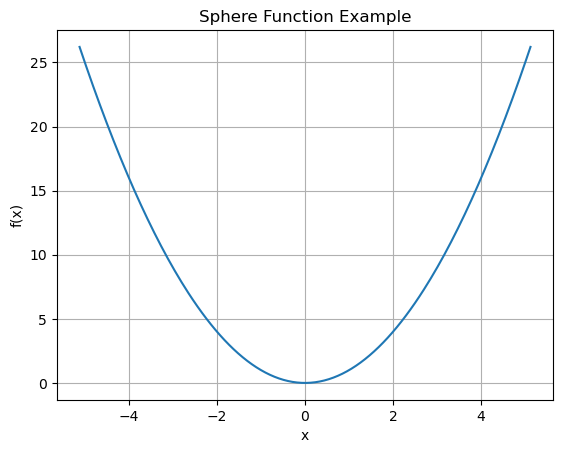

Minimum point: 0
Minimum value: 0


In [26]:
x = np.linspace(-5.12, 5.12, 200)
y = np.array([sphere([xi]) for xi in x]) 


plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Sphere Function Example')
plt.grid(True)
plt.show()

import sympy as sp
x = sp.symbols('x')
f = x**2

df = sp.diff(f,x)

min_point = sp.solve(df, x)  
min_value = f.subs(x, min_point[0])
print("Minimum point:", min_point[0])
print("Minimum value:", min_value)

## Rosenbrock 

In [56]:
def rosenbrock(x):
    x = np.array(x)
    return np.sum(100.0 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2) 

In [58]:
rosenbrock([1,1])

0.0

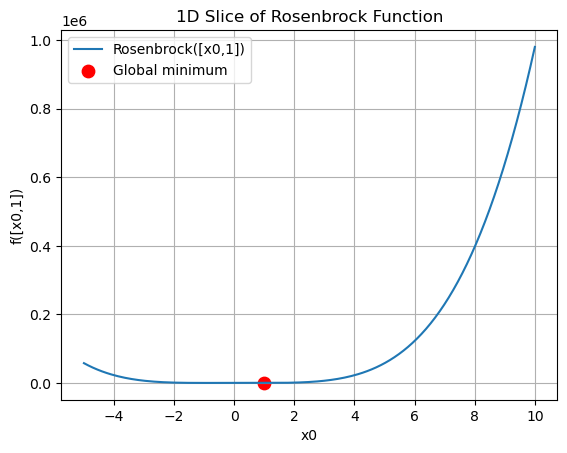

Minimum point: (1, 1)
Minimum value: 0


In [68]:
x = np.linspace(-5, 10, 200)
y = np.array([rosenbrock([xi, 1]) for xi in x]) 


plt.plot(x, y, label='Rosenbrock([x0,1])')
plt.scatter(1, rosenbrock([1, 1]), color='red', s=80, label='Global minimum')
plt.xlabel('x0')
plt.ylabel('f([x0,1])')
plt.title('1D Slice of Rosenbrock Function')
plt.grid(True)
plt.legend()
plt.show()

import sympy as sp
x0, x1 = sp.symbols('x0 x1')
f = 100 * (x1 - x0**2)**2 + (1 - x0)**2  # 2D Rosenbrock
# Compute derivatives
df_dx0 = sp.diff(f, x0)
df_dx1 = sp.diff(f, x1)

min_point = sp.solve([df_dx0, df_dx1], (x0, x1))
print("Minimum point:", min_point[0])

min_value = f.subs({x0: min_point[0][0], x1: min_point[0][1]})
print("Minimum value:", min_value)

## Rastigrin

In [70]:
def rastigrin(x):
    x = np.array(x)
    sum = np.sum (x**2 - 10 * np.cos(2*math.pi*x))
    
    return 10 * x.size + sum

In [71]:
rastigrin([1,2])

5.0

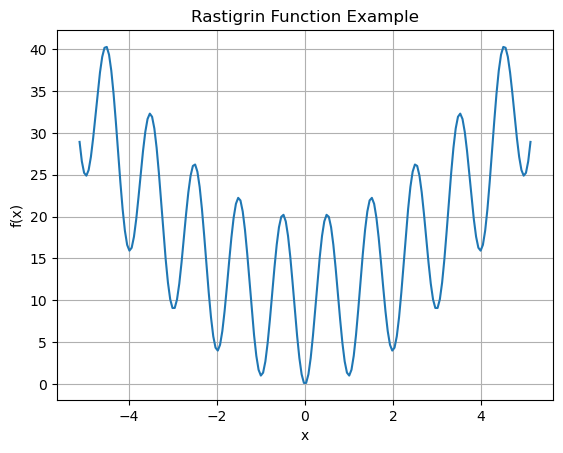

Minimum point: 0
Minimum value: 0


In [77]:
x = np.linspace(-5.12, 5.12, 200)
y = np.array([rastigrin([xi]) for xi in x]) 


plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Rastigrin Function Example')
plt.grid(True)
plt.show()

x = sp.symbols('x')
f = 10 + x**2 - 10*sp.cos(2*sp.pi*x)
df = sp.diff(f, x)

min_point = sp.nsolve(df, x, 0)  
min_value = f.subs(x, min_point)

print("Minimum point:", min_point)
print("Minimum value:", min_value)

## Ackley

In [78]:
def ackley(x):
    x = np.array(x)

    mean_squared_sum = np.sum(x**2)/x.size
    mean_cos_sum = np.sum(np.cos(2 * math.pi * x))/x.size

    ackley = -20 * np.exp(-0.2 * np.sqrt(mean_squared_sum)) - np.exp(mean_cos_sum) + 20 + np.e
  
    return ackley

In [79]:
ackley([1,2,3])

7.0164536082694

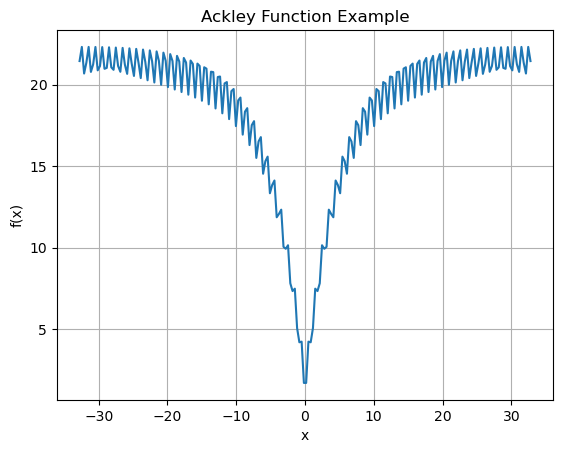

In [90]:
x = np.linspace(-32.786,32.786, 200)
y = np.array([ackley([xi]) for xi in x]) 


plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Ackley Function Example')
plt.grid(True)
plt.show()


# Setup and Configuration Parameters

In [91]:
# Dimensions
n = [2, 10, 30]

# Max Iterations
max_iter = 300

# Number of Runs
n_runs = 30

In [93]:
swarm_size = 30
# When n=30, increase swarm size
swarm_size_30 = 50

# Parameters
w = 0.7      
c1 = 1.5
c2 = 1.5

In [94]:
# Bounds for each function
bounds_sphere = [-5.12, 5.12]
bounds_rosenbrock = [-5, 10]
bounds_rastrigin = [-5.12, 5.12]
bounds_ackley = [-32.786,32.786]

In [95]:
threshold_sphere_rosenbrock = 10**(-8)
threshold_rastigrin_ackley = 10**(-4)

# Particle Swarm Optimization Code

In [132]:
import random
import numpy as np
# This has been adapted from the code in Lab 5
class Particle:
    def __init__(self, w, c1, c2, bounds, function, num_dim):
        self.w = w
        self.c1 = c1
        self.c2 = c2
        
        self.position_i = [random.uniform(b[0], b[1]) for b in bounds]
        self.velocity_i = [random.uniform(-0.2*(b[1]-b[0]), 0.2*(b[1]-b[0])) for b in bounds]
        self.pos_best_i = list(self.position_i)
        self.err_best_i = float('inf')
        self.err_i = float('inf')
        self.function = function
        self.num_dim = num_dim
        self.V_max = [0.5 * (b[1] - b[0]) for b in bounds]

    # evaluate current fitness
    def evaluate(self):
        self.err_i = self.function(self.position_i)

        # check to see if the current position is an individual best
        if self.err_i < self.err_best_i:
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    # update new particle velocity
    def update_velocity(self,pos_best_g):
        w = self.w
        c1 = self.c1
        c2 = self.c2

        for i in range(0,self.num_dim):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            # self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social
            velocity = w*self.velocity_i[i]+vel_cognitive+vel_social
            if velocity > self.V_max[i]:
                velocity = self.V_max[i]
            if velocity < -self.V_max[i]:
                velocity = -self.V_max[i]
            self.velocity_i[i] = velocity

    # update the particle position based on new velocity updates
    def update_position(self, bounds):
        for i in range(0,self.num_dim):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]

            # adjust maximum position if necessary
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # adjust minimum position if necessary
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i] = bounds[i][0]

class PSO():
    def __init__(self, num_dim, function, bounds, swarm_size, maxiter, w, c1, c2, early_stop_threshold):
        self.num_dim = num_dim
        self.function = function
        self.swarm_size = swarm_size
        self.maxiter = maxiter
        self.w = w
        self.c1 = c1
        self.c2 = c2
        self.bounds = bounds

        self.swarm = [Particle(w, c1, c2, bounds, function, num_dim) for _ in range(swarm_size)]
        self.pos_best_g = None
        self.err_best_g = float('inf')

        self.early_stop_threshold = early_stop_threshold
        self.err_best_g_history = []
        self.iterations = 0
        self.pbest_history = [[] for _ in range(self.swarm_size)] 

    def run(self):
       
        # begin optimization loop
        i=0
        while i < self.maxiter:
            #print i,err_best_g
            # cycle through particles in swarm and evaluate fitness
            for j in range(0,self.swarm_size):
                self.swarm[j].evaluate()
                self.pbest_history[j].append(self.swarm[j].err_best_i)
                # determine if current particle is the best (globally)
                if self.swarm[j].err_i < self.err_best_g or self.err_best_g == -1:
                    self.pos_best_g=list(self.swarm[j].position_i)
                    self.err_best_g=float(self.swarm[j].err_i)
                    self.err_best_g_history.append(self.err_best_g)

            # cycle through swarm and update velocities and position
            for j in range(0, self.swarm_size):
                self.swarm[j].update_velocity(self.pos_best_g)
                self.swarm[j].update_position(self.bounds)
            i+=1
            if self.err_best_g < self.early_stop_threshold:
                break

        # print final results
        #print ('FINAL:')
        #print (self.pos_best_g)
        #print (self.err_best_g)
        #print(i)
        self.iterations = i

In [16]:
optimizer = PSO(2, sphere, [(-5.12, 5.12)] * 2, swarm_size, max_iter, w, c1, c2, 10**(-8))

In [17]:
optimizer.run()

FINAL:
[-9.478568807011478e-05, 1.8379329239947163e-05]
9.322126406235476e-09
46


# Sphere; N = 2

In [157]:
# Dimension: 2
n = 2
swarm_size = 30
max_iter = 300
bounds_sphere = [(-5.12, 5.12)]*n

w = 0.7      
c1 = 1.5
c2 = 1.5
n_runs = 30
threshold_sphere_rosenbrock = 10**(-8)

all_runs = []
for run in range(n_runs):
    random.seed(run)      
    np.random.seed(run)


    pso = PSO(num_dim=n, function=sphere, bounds=bounds_sphere, 
              swarm_size=swarm_size, maxiter=max_iter, 
              w=w, c1=c1, c2=c2, early_stop_threshold=threshold_sphere_rosenbrock)
    pso.run()
    run_result = {
        'final_fitness': pso.err_best_g,
        'best_position': pso.pos_best_g,
        'iterations': pso.iterations,
        'fitness_history': pso.err_best_g_history,
        'evaluations': pso.iterations * swarm_size,
        'pbest_history': pso.pbest_history
    }
    all_runs.append(run_result)

# Compute Statistics for Final Fitness
final_fitnesses = np.array([run['final_fitness'] for run in all_runs])
mean_final_fitness = np.mean(final_fitnesses)
median_final_fitness = np.median(final_fitnesses)
best_final_fitness = np.min(final_fitnesses)
worst_final_fitness = np.max(final_fitnesses)
std_dev_final_fitness = np.std(final_fitnesses)
success_rate_final_fitness = np.sum(final_fitnesses < threshold_sphere_rosenbrock)/n_runs

print("Final fitness stats for 2D Sphere over 30 runs:")
print("Mean:", mean_final_fitness)
print("Median:", median_final_fitness)
print("Best:", best_final_fitness)
print("Worst:", worst_final_fitness)
print("Std Dev:", std_dev_final_fitness)
print("Success Rate:", success_rate_final_fitness)

Final fitness stats for 2D Sphere over 30 runs:
Mean: 5.604438801017132e-09
Median: 5.9173268253036395e-09
Best: 1.5218686039246193e-10
Worst: 9.048283210105674e-09
Std Dev: 2.5042625795622855e-09
Success Rate: 1.0


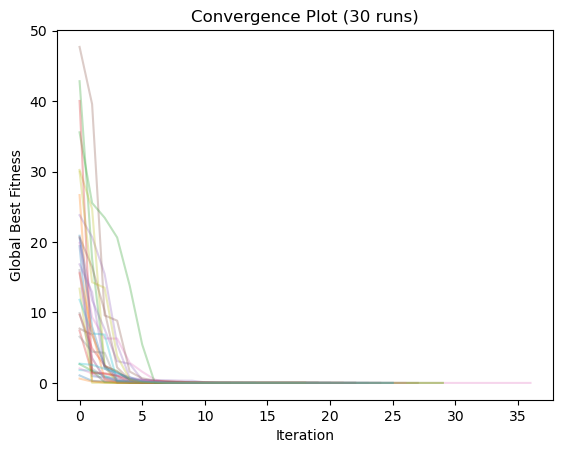

In [158]:
for run in all_runs:
    plt.plot(run['fitness_history'], alpha=0.3)
plt.xlabel('Iteration')
plt.ylabel('Global Best Fitness')
plt.title('Convergence Plot (30 runs)')
plt.show()

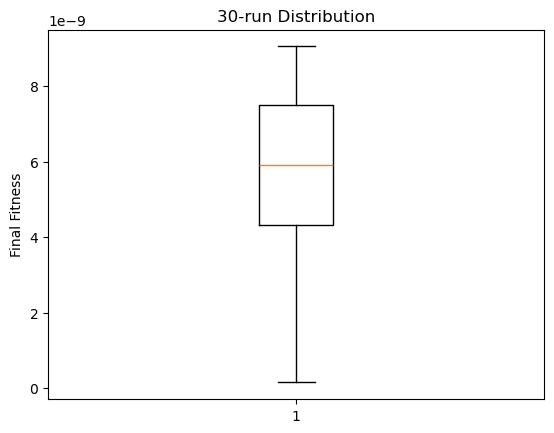

In [159]:
final_fitnesses = [r['final_fitness'] for r in all_runs]
plt.boxplot(final_fitnesses)
plt.ylabel('Final Fitness')
plt.title('30-run Distribution')
plt.show()


In [160]:
import pandas as pd
from tabulate import tabulate

# Extract final fitness from all runs
final_fitnesses = [run['final_fitness'] for run in all_runs]

# Create a DataFrame with Run as index (ID)
df = pd.DataFrame({
    'Final Fitness': final_fitnesses
}, index=range(1, len(final_fitnesses)+1))

df.index.name = 'Run'  # Name the index column

# Round for display only (keeps floats for calculations)
df_display = df.copy()
df_display['Final Fitness'] = df_display['Final Fitness'].apply(lambda x: f"{x:.1e}")
#df_display['Final Fitness'] = df_display['Final Fitness'].astype(int)



display(df_display)


,Final Fitness
Run,
1,8.2e-09
2,2.7e-09
3,8.4e-09
4,8.7e-09
5,6.7e-09
6,5.1e-09
7,5.1e-09
8,1.1e-09
9,7.3e-09


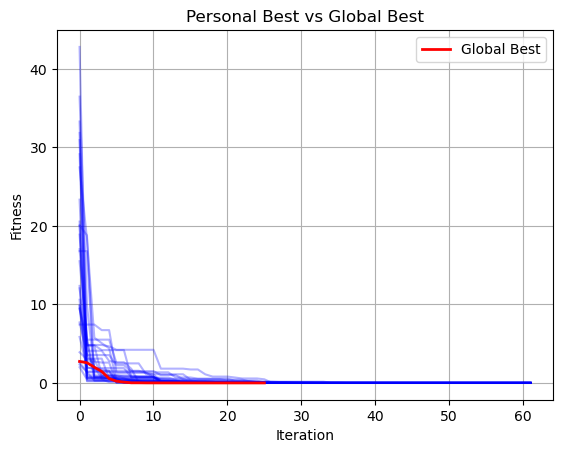

(30, 62)


In [161]:
import numpy as np
import matplotlib.pyplot as plt

pbests = np.array(pso.pbest_history)  # shape: (swarm_size, iterations)
gbest = np.array(pso.err_best_g_history)  # shape: (iterations,)

for j in range(pbests.shape[0]):
    plt.plot(pbests[j], alpha=0.3, color='blue')  # individual particle pbest
plt.plot(gbest, color='red', linewidth=2, label='Global Best')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('Personal Best vs Global Best')
plt.legend()
plt.grid(True)
plt.show()
pbests = np.array(pso.pbest_history)
print(pbests.shape)  # should be (swarm_size, iterations)


## Parameter Study

In [162]:
w1 = 0.4

# Dimension: 2
n = 2
swarm_size = 30
max_iter = 300
bounds_sphere = [(-5.12, 5.12)]*n

c1 = 1.5
c2 = 1.5
n_runs = 30
threshold_sphere_rosenbrock = 10**(-8)

all_runs_lower_w = []
for run in range(n_runs):
    random.seed(run)      
    np.random.seed(run)


    pso = PSO(num_dim=n, function=sphere, bounds=bounds_sphere, 
              swarm_size=swarm_size, maxiter=max_iter, 
              w=w1, c1=c1, c2=c2, early_stop_threshold=threshold_sphere_rosenbrock)
    pso.run()
    run_result = {
        'final_fitness': pso.err_best_g,
        'best_position': pso.pos_best_g,
        'iterations': pso.iterations,
        'fitness_history': pso.err_best_g_history,
        'evaluations': pso.iterations * swarm_size,
        'pbest_history': pso.pbest_history
    }
    all_runs_lower_w.append(run_result)



In [163]:
w2 = 0.9

# Dimension: 2
n = 2
swarm_size = 30
max_iter = 300
bounds_sphere = [(-5.12, 5.12)]*n

c1 = 1.5
c2 = 1.5
n_runs = 30
threshold_sphere_rosenbrock = 10**(-8)

all_runs_higher_w = []
for run in range(n_runs):
    random.seed(run)      
    np.random.seed(run)


    pso = PSO(num_dim=n, function=sphere, bounds=bounds_sphere, 
              swarm_size=swarm_size, maxiter=max_iter, 
              w=w2, c1=c1, c2=c2, early_stop_threshold=threshold_sphere_rosenbrock)
    pso.run()
    run_result = {
        'final_fitness': pso.err_best_g,
        'best_position': pso.pos_best_g,
        'iterations': pso.iterations,
        'fitness_history': pso.err_best_g_history,
        'evaluations': pso.iterations * swarm_size,
        'pbest_history': pso.pbest_history
    }
    all_runs_higher_w.append(run_result)




In [166]:
# Dimension: 2
n = 2
swarm_size = 30
max_iter = 300
bounds_sphere = [(-5.12, 5.12)]*n

w = 0.7      
c1_1 = 1
c2 = 1.5
n_runs = 30
threshold_sphere_rosenbrock = 10**(-8)

all_runs_lower_c1 = []
for run in range(n_runs):
    random.seed(run)      
    np.random.seed(run)


    pso = PSO(num_dim=n, function=sphere, bounds=bounds_sphere, 
              swarm_size=swarm_size, maxiter=max_iter, 
              w=w, c1=c1_1, c2=c2, early_stop_threshold=threshold_sphere_rosenbrock)
    pso.run()
    run_result = {
        'final_fitness': pso.err_best_g,
        'best_position': pso.pos_best_g,
        'iterations': pso.iterations,
        'fitness_history': pso.err_best_g_history,
        'evaluations': pso.iterations * swarm_size,
        'pbest_history': pso.pbest_history
    }
    all_runs_lower_c1.append(run_result)

In [167]:
# Dimension: 2
n = 2
swarm_size = 30
max_iter = 300
bounds_sphere = [(-5.12, 5.12)]*n

w = 0.7      
c1_2 = 2
c2 = 1.5
n_runs = 30
threshold_sphere_rosenbrock = 10**(-8)

all_runs_higher_c1 = []
for run in range(n_runs):
    random.seed(run)      
    np.random.seed(run)


    pso = PSO(num_dim=n, function=sphere, bounds=bounds_sphere, 
              swarm_size=swarm_size, maxiter=max_iter, 
              w=w, c1=c1_2, c2=c2, early_stop_threshold=threshold_sphere_rosenbrock)
    pso.run()
    run_result = {
        'final_fitness': pso.err_best_g,
        'best_position': pso.pos_best_g,
        'iterations': pso.iterations,
        'fitness_history': pso.err_best_g_history,
        'evaluations': pso.iterations * swarm_size,
        'pbest_history': pso.pbest_history
    }
    all_runs_higher_c1.append(run_result)


In [169]:
# Dimension: 2
n = 2
swarm_size = 30
max_iter = 300
bounds_sphere = [(-5.12, 5.12)]*n

w = 0.7      
c1 = 1.5
c2_1 = 1
n_runs = 30
threshold_sphere_rosenbrock = 10**(-8)

all_runs_lower_c2 = []
for run in range(n_runs):
    random.seed(run)      
    np.random.seed(run)


    pso = PSO(num_dim=n, function=sphere, bounds=bounds_sphere, 
              swarm_size=swarm_size, maxiter=max_iter, 
              w=w, c1=c1, c2=c2_1, early_stop_threshold=threshold_sphere_rosenbrock)
    pso.run()
    run_result = {
        'final_fitness': pso.err_best_g,
        'best_position': pso.pos_best_g,
        'iterations': pso.iterations,
        'fitness_history': pso.err_best_g_history,
        'evaluations': pso.iterations * swarm_size,
        'pbest_history': pso.pbest_history
    }
    all_runs_lower_c2.append(run_result)



In [170]:
# Dimension: 2
n = 2
swarm_size = 30
max_iter = 300
bounds_sphere = [(-5.12, 5.12)]*n

w = 0.7      
c1 = 1.5
c2_2 = 2
n_runs = 30
threshold_sphere_rosenbrock = 10**(-8)

all_runs_higher_c2 = []
for run in range(n_runs):
    random.seed(run)      
    np.random.seed(run)


    pso = PSO(num_dim=n, function=sphere, bounds=bounds_sphere, 
              swarm_size=swarm_size, maxiter=max_iter, 
              w=w, c1=c1, c2=c2_2, early_stop_threshold=threshold_sphere_rosenbrock)
    pso.run()
    run_result = {
        'final_fitness': pso.err_best_g,
        'best_position': pso.pos_best_g,
        'iterations': pso.iterations,
        'fitness_history': pso.err_best_g_history,
        'evaluations': pso.iterations * swarm_size,
        'pbest_history': pso.pbest_history
    }
    all_runs_higher_c2.append(run_result)

In [176]:
# Stats for lower w
final_fit_lower_w = np.array([run['final_fitness'] for run in all_runs_lower_w])
mean_final_fit_lower_w = np.mean(final_fit_lower_w)
median_final_fit_lower_w = np.mean(final_fit_lower_w)
best_final_fit_lower_w = np.min(final_fit_lower_w)
worst_final_fit_lower_w = np.max(final_fit_lower_w)
std_dev_final_fit_lower_w = np.std(final_fit_lower_w)
success_rate_final_fit_lower_w = np.sum(final_fit_lower_w < threshold_sphere_rosenbrock)/n_runs

# Stats for higher w
final_fit_higher_w = np.array([run['final_fitness'] for run in all_runs_higher_w])
mean_final_fit_higher_w= np.mean(final_fit_higher_w)
median_final_fit_higher_w = np.mean(final_fit_higher_w)
best_final_fit_higher_w= np.min(final_fit_higher_w)
worst_final_fit_higher_w = np.max(final_fit_higher_w)
std_dev_final_fit_higher_w = np.std(final_fit_higher_w)
success_rate_final_fit_higher_w = np.sum(final_fit_higher_w < threshold_sphere_rosenbrock)/n_runs

import pandas as pd
from tabulate import tabulate

# Create a dictionary with the stats for each w
data = {
    'Metric': ['Mean', 'Median', 'Best', 'Worst', 'Std Dev', 'Success Rate'],
    'Lower w': [mean_final_fit_lower_w,
                median_final_fit_lower_w,
                best_final_fit_lower_w,
                worst_final_fit_lower_w,
                std_dev_final_fit_lower_w,
                success_rate_final_fit_lower_w],
    'Base w': [mean_final_fitness,
               median_final_fitness,
               best_final_fitness,
               worst_final_fitness,
               std_dev_final_fitness,
               success_rate_final_fitness],
               
    'Higher w': [mean_final_fit_higher_w,
                 median_final_fit_higher_w,
                 best_final_fit_higher_w,
                 worst_final_fit_higher_w,
                 std_dev_final_fit_higher_w,
                 success_rate_final_fit_higher_w]
}

# Convert to DataFrame
df = pd.DataFrame(data)

print(tabulate(df, headers='keys', tablefmt='grid'))


+----+--------------+-------------+-------------+-------------+
|    | Metric       |     Lower w |      Base w |    Higher w |
+====+==============+=============+=============+=============+
|  0 | Mean         | 3.87971e-09 | 5.60444e-09 | 1.39948e-07 |
+----+--------------+-------------+-------------+-------------+
|  1 | Median       | 3.87971e-09 | 5.91733e-09 | 1.39948e-07 |
+----+--------------+-------------+-------------+-------------+
|  2 | Best         | 5.44395e-10 | 1.52187e-10 | 2.45442e-09 |
+----+--------------+-------------+-------------+-------------+
|  3 | Worst        | 8.62597e-09 | 9.04828e-09 | 8.04874e-07 |
+----+--------------+-------------+-------------+-------------+
|  4 | Std Dev      | 2.34849e-09 | 2.50426e-09 | 2.13286e-07 |
+----+--------------+-------------+-------------+-------------+
|  5 | Success Rate | 1           | 1           | 0.4         |
+----+--------------+-------------+-------------+-------------+


In [177]:
# Stats for lower c1
final_fit_lower_c1 = np.array([run['final_fitness'] for run in all_runs_lower_c1])
mean_final_fit_lower_c1 = np.mean(final_fit_lower_c1)
median_final_fit_lower_c1 = np.mean(final_fit_lower_c1)
best_final_fit_lower_c1 = np.min(final_fit_lower_c1)
worst_final_fit_lower_c1 = np.max(final_fit_lower_c1)
std_dev_final_fit_lower_c1 = np.std(final_fit_lower_c1)
success_rate_final_fit_lower_c1 = np.sum(final_fit_lower_c1 < threshold_sphere_rosenbrock)/n_runs

# Stats for higher w
final_fit_higher_c1 = np.array([run['final_fitness'] for run in all_runs_higher_c1])
mean_final_fit_higher_c1= np.mean(final_fit_higher_c1)
median_final_fit_higher_c1 = np.mean(final_fit_higher_c1)
best_final_fit_higher_c1= np.min(final_fit_higher_c1)
worst_final_fit_higher_c1 = np.max(final_fit_higher_c1)
std_dev_final_fit_higher_c1 = np.std(final_fit_higher_c1)
success_rate_final_fit_higher_c1 = np.sum(final_fit_higher_c1 < threshold_sphere_rosenbrock)/n_runs

import pandas as pd
from tabulate import tabulate

# Create a dictionary with the stats for each w
data = {
    'Metric': ['Mean', 'Median', 'Best', 'Worst', 'Std Dev', 'Success Rate'],
    'Lower w': [mean_final_fit_lower_c1,
                median_final_fit_lower_c1,
                best_final_fit_lower_c1,
                worst_final_fit_lower_c1,
                std_dev_final_fit_lower_c1,
                success_rate_final_fit_lower_c1],
    'Base w': [mean_final_fitness,
               median_final_fitness,
               best_final_fitness,
               worst_final_fitness,
               std_dev_final_fitness,
               success_rate_final_fitness],
               
    'Higher w': [mean_final_fit_higher_c1,
                 median_final_fit_higher_c1,
                 best_final_fit_higher_c1,
                 worst_final_fit_higher_c1,
                 std_dev_final_fit_higher_c1,
                 success_rate_final_fit_higher_c1]
}

# Convert to DataFrame
df = pd.DataFrame(data)

print(tabulate(df, headers='keys', tablefmt='grid'))


+----+--------------+-------------+-------------+-------------+
|    | Metric       |     Lower w |      Base w |    Higher w |
+====+==============+=============+=============+=============+
|  0 | Mean         | 5.60444e-09 | 5.60444e-09 | 5.60444e-09 |
+----+--------------+-------------+-------------+-------------+
|  1 | Median       | 5.60444e-09 | 5.91733e-09 | 5.60444e-09 |
+----+--------------+-------------+-------------+-------------+
|  2 | Best         | 1.52187e-10 | 1.52187e-10 | 1.52187e-10 |
+----+--------------+-------------+-------------+-------------+
|  3 | Worst        | 9.04828e-09 | 9.04828e-09 | 9.04828e-09 |
+----+--------------+-------------+-------------+-------------+
|  4 | Std Dev      | 2.50426e-09 | 2.50426e-09 | 2.50426e-09 |
+----+--------------+-------------+-------------+-------------+
|  5 | Success Rate | 1           | 1           | 1           |
+----+--------------+-------------+-------------+-------------+


In [179]:
# Stats for lower c2
final_fit_lower_c2 = np.array([run['final_fitness'] for run in all_runs_lower_c2])
mean_final_fit_lower_c2 = np.mean(final_fit_lower_c2)
median_final_fit_lower_c2 = np.mean(final_fit_lower_c2)
best_final_fit_lower_c2 = np.min(final_fit_lower_c2)
worst_final_fit_lower_c2 = np.max(final_fit_lower_c2)
std_dev_final_fit_lower_c2 = np.std(final_fit_lower_c2)
success_rate_final_fit_lower_c2 = np.sum(final_fit_lower_c2 < threshold_sphere_rosenbrock)/n_runs

# Stats for higher w
final_fit_higher_c2 = np.array([run['final_fitness'] for run in all_runs_higher_c2])
mean_final_fit_higher_c2= np.mean(final_fit_higher_c2)
median_final_fit_higher_c2 = np.mean(final_fit_higher_c2)
best_final_fit_higher_c2= np.min(final_fit_higher_c2)
worst_final_fit_higher_c2 = np.max(final_fit_higher_c2)
std_dev_final_fit_higher_c2 = np.std(final_fit_higher_c2)
success_rate_final_fit_higher_c2 = np.sum(final_fit_higher_c2 < threshold_sphere_rosenbrock)/n_runs

import pandas as pd
from tabulate import tabulate

# Create a dictionary with the stats for each w
data = {
    'Metric': ['Mean', 'Median', 'Best', 'Worst', 'Std Dev', 'Success Rate'],
    'Lower w': [mean_final_fit_lower_c2,
                median_final_fit_lower_c2,
                best_final_fit_lower_c2,
                worst_final_fit_lower_c2,
                std_dev_final_fit_lower_c2,
                success_rate_final_fit_lower_c2],
    'Base w': [mean_final_fitness,
               median_final_fitness,
               best_final_fitness,
               worst_final_fitness,
               std_dev_final_fitness,
               success_rate_final_fitness],
               
    'Higher w': [mean_final_fit_higher_c2,
                 median_final_fit_higher_c2,
                 best_final_fit_higher_c2,
                 worst_final_fit_higher_c2,
                 std_dev_final_fit_higher_c2,
                 success_rate_final_fit_higher_c2]
}

# Convert to DataFrame
df = pd.DataFrame(data)

print(tabulate(df, headers='keys', tablefmt='grid'))


+----+--------------+-------------+-------------+-------------+
|    | Metric       |     Lower w |      Base w |    Higher w |
+====+==============+=============+=============+=============+
|  0 | Mean         | 4.41714e-09 | 5.60444e-09 | 5.34476e-09 |
+----+--------------+-------------+-------------+-------------+
|  1 | Median       | 4.41714e-09 | 5.91733e-09 | 5.34476e-09 |
+----+--------------+-------------+-------------+-------------+
|  2 | Best         | 2.53713e-10 | 1.52187e-10 | 7.92012e-11 |
+----+--------------+-------------+-------------+-------------+
|  3 | Worst        | 9.64397e-09 | 9.04828e-09 | 9.95522e-09 |
+----+--------------+-------------+-------------+-------------+
|  4 | Std Dev      | 2.65841e-09 | 2.50426e-09 | 3.06459e-09 |
+----+--------------+-------------+-------------+-------------+
|  5 | Success Rate | 1           | 1           | 1           |
+----+--------------+-------------+-------------+-------------+


# Sphere; N = 3

# Hybrid Local Search

In [227]:
import random
import numpy as np
# This has been adapted from the code in Lab 5
class Particle:
    def __init__(self, w, c1, c2, bounds, function, num_dim):
        self.w = w
        self.c1 = c1
        self.c2 = c2
        
        self.position_i = [random.uniform(b[0], b[1]) for b in bounds]
        #self.velocity_i = [random.uniform(-0.2*(b[1]-b[0]), 0.2*(b[1]-b[0])) for b in bounds]
        self.velocity_i = [0.0]*num_dim
        self.pos_best_i = list(self.position_i)
        self.err_best_i = float('inf')
        self.err_i = float('inf')
        self.function = function
        self.num_dim = num_dim
        self.V_max = [0.5 * (b[1] - b[0]) for b in bounds]

    # evaluate current fitness
    def evaluate(self):
        self.err_i = self.function(self.position_i)

        # check to see if the current position is an individual best
        if self.err_i < self.err_best_i:
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    # update new particle velocity
    def update_velocity(self,pos_best_g):
        w = self.w
        c1 = self.c1
        c2 = self.c2

        for i in range(0,self.num_dim):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            # self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social
            velocity = w*self.velocity_i[i]+vel_cognitive+vel_social
            if velocity > self.V_max[i]:
                velocity = self.V_max[i]
            if velocity < -self.V_max[i]:
                velocity = -self.V_max[i]
            self.velocity_i[i] = velocity

    # update the particle position based on new velocity updates
    def update_position(self, bounds):
        for i in range(0,self.num_dim):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]

            # adjust maximum position if necessary
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # adjust minimum position if necessary
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i] = bounds[i][0]

class PSO():
    def __init__(self, num_dim, function, bounds, swarm_size, maxiter, w, c1, c2, early_stop_threshold, k_clusters):
        self.num_dim = num_dim
        self.function = function
        self.swarm_size = swarm_size
        self.maxiter = maxiter
        self.w = w
        self.c1 = c1
        self.c2 = c2
        self.bounds = bounds

        self.swarm = [Particle(w, c1, c2, bounds, function, num_dim) for _ in range(swarm_size)]
        self.pos_best_g = None
        self.err_best_g = float('inf')

        self.early_stop_threshold = early_stop_threshold
        self.err_best_g_history = []
        self.iterations = 0
        self.pbest_history = [[] for _ in range(self.swarm_size)] 
        self.k_clusters = k_clusters
        self.cluster_centers = random.sample([p.position_i for p in self.swarm], k_clusters)
        
    def assign_clusters(self):
        self.clusters = [[] for _ in range(self.k_clusters)]
        for p in self.swarm:
            distances = [np.linalg.norm(np.array(p.position_i) - np.array(center)) for center in self.cluster_centers]
            cluster_idx = np.argmin(distances)
            self.clusters[cluster_idx].append(p)
    

    def run(self):
       
        # begin optimization loop
        i=0
        while i < self.maxiter:
            #print i,err_best_g
            # cycle through particles in swarm and evaluate fitness
            for j in range(0,self.swarm_size):
                self.swarm[j].evaluate()
                self.pbest_history[j].append(self.swarm[j].err_best_i)
                # determine if current particle is the best (globally)
                if self.swarm[j].err_i < self.err_best_g or self.err_best_g == -1:
                    self.pos_best_g=list(self.swarm[j].position_i)
                    self.err_best_g=float(self.swarm[j].err_i)
                    self.err_best_g_history.append(self.err_best_g)

            # cycle through swarm and update velocities and position
            for j in range(0, self.swarm_size):
                self.swarm[j].update_velocity(self.pos_best_g)
                self.swarm[j].update_position(self.bounds)
            i+=1
            # K-means like assignment
            self.assign_clusters()

            # Apply Nelder-Mead simplex per cluster
            
            self.apply_nelder_mead()

            if self.err_best_g < self.early_stop_threshold:
                break

        # print final results
        #print ('FINAL:')
        #print (self.pos_best_g)
        #print (self.err_best_g)
        #print(i)
        self.iterations = i
    
    def apply_nelder_mead(self):
            # Randomly select cluster centers from current swarm positions
            for idx, cluster in enumerate(self.clusters):
                if len(cluster) < self.num_dim + 1:
                    continue
                # Initial simplex: particle positions in cluster
                initial_simplex = np.array([p.position_i for p in cluster[:self.num_dim+1]])
                # Use Nelder-Mead
                # Start from the first particle
                start = initial_simplex[0]
                res = minimize(self.function, start, method='Nelder-Mead',
                               options={'initial_simplex': initial_simplex, 'maxiter': 5})
    
                # Move **best particle** in cluster toward simplex result
                best_particle = min(cluster, key=lambda p: p.err_best_i)
                best_particle.position_i = res.x.tolist()
                best_particle.evaluate()
                # Update cluster center for next iteration
                self.cluster_centers[idx] = res.x.tolist()

In [228]:
# Dimension: 2
n = 2
swarm_size = 30
max_iter = 300
bounds_sphere = [(-5.12, 5.12)]*n

w = 0.7      
c1 = 1.5
c2 = 1.5
n_runs = 30
threshold_sphere_rosenbrock = 10**(-8)

all_runs = []
for run in range(n_runs):
    random.seed(run)      
    np.random.seed(run)


    pso = PSO(num_dim=n, function=sphere, bounds=bounds_sphere, 
              swarm_size=swarm_size, maxiter=max_iter, 
              w=w, c1=c1, c2=c2, early_stop_threshold=threshold_sphere_rosenbrock, k_clusters = 3)
    pso.run()
    run_result = {
        'final_fitness': pso.err_best_g,
        'best_position': pso.pos_best_g,
        'iterations': pso.iterations,
        'fitness_history': pso.err_best_g_history,
        'evaluations': pso.iterations * swarm_size,
        'pbest_history': pso.pbest_history
    }
    all_runs.append(run_result)

# Compute Statistics for Final Fitness
final_fitnesses = np.array([run['final_fitness'] for run in all_runs])
mean_final_fitness = np.mean(final_fitnesses)
median_final_fitness = np.median(final_fitnesses)
best_final_fitness = np.min(final_fitnesses)
worst_final_fitness = np.max(final_fitnesses)
std_dev_final_fitness = np.std(final_fitnesses)
success_rate_final_fitness = np.sum(final_fitnesses < threshold_sphere_rosenbrock)/n_runs

print("Final fitness stats for 2D Sphere over 30 runs:")
print("Mean:", mean_final_fitness)
print("Median:", median_final_fitness)
print("Best:", best_final_fitness)
print("Worst:", worst_final_fitness)
print("Std Dev:", std_dev_final_fitness)
print("Success Rate:", success_rate_final_fitness)

Final fitness stats for 2D Sphere over 30 runs:
Mean: 4.74675599862677e-09
Median: 5.100425757422224e-09
Best: 0.0
Worst: 9.92715651400844e-09
Std Dev: 2.9608407382076285e-09
Success Rate: 1.0


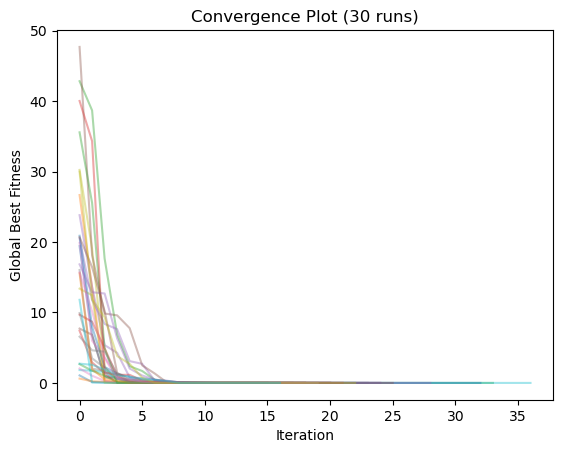

In [229]:
for run in all_runs:
    plt.plot(run['fitness_history'], alpha=0.4)
plt.xlabel('Iteration')
plt.ylabel('Global Best Fitness')
plt.title('Convergence Plot (30 runs)')
plt.show()